# Table of Contents

[2 PRELIMINARIES [2](#preliminaries)](#preliminaries)

[3 RESONANT TANK BOARD [3](#resonant-tank-board)](#resonant-tank-board)

[3.1 Schematics [3](#schematics)](#schematics)

[3.1.1 Resonant Tank [3](#resonant-tank)](#resonant-tank)

[3.1.2 Voltage Sensing [4](#_Toc138153811)](#_Toc138153811)

[3.1.3 Current Sensing [4](#current-sensing)](#current-sensing)

[3.2 PCB board [5](#pcb-board)](#pcb-board)

[3.2.1 Connectors [5](#connectors)](#connectors)

[3.2.2 Components list [5](#components-list)](#components-list)

[4 RECTIFIER BOARD [9](#_Toc138153816)](#_Toc138153816)

[4.1 SCHEMATICS [9](#_Toc138153817)](#_Toc138153817)

[4.1.1 Rectifier and Filter [9](#_Toc138153818)](#_Toc138153818)

[4.1.2 Battery Voltage Sensing [11](#_Toc138153819)](#_Toc138153819)

[4.1.3 Battery Current Sensing [12](#_Toc138153820)](#_Toc138153820)

[4.1.4 ADC [14](#_Toc138153821)](#_Toc138153821)

[4.2 PCB board [15](#_Toc138153822)](#_Toc138153822)

[4.2.1 Connectors [15](#_Toc138153823)](#_Toc138153823)

[4.2.2 Components list (BOM) [15](#_Toc138153824)](#_Toc138153824)

[5 APPENDIX [19](#_Toc138153825)](#_Toc138153825)

[5.1 BALUN circuit [19](#balun-circuit)](#balun-circuit)

# PRELIMINARIES

Power specifications:

-   Battery voltage: 40V

-   Maximum Power: 500W

-   Maximum output current: 10A

Therefore, more or less, we have 10A current at the input, …

ADC for the resonant tank are limited to 0.5V (1Vpp)

Bypass capacitors must be used near to all the power supply pins.

FPGA should have enough power to power-up the sensing circuit at battery
level:

5V @ 12A and 3.3V @ 8A

# RESONANT TANK BOARD

The core of the resonant tank is composed by an inductor $L_{r}$, a
capacitor $C_{r}$ and a transformer $T_{r}$ (with magnetizing inductance
$L_{m}$). The input is a square waveform generated by an H-bridge and
the output of the transformer is sinusoidal

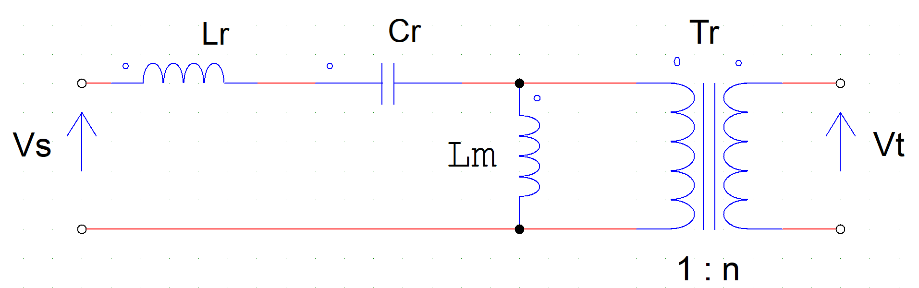

Figure 1: Resonant tank

The current and the voltage on the capacitor $C_{r}$ is measured in
order to close the loop and ensure the oscillation.

Two sensing circuits are used to measure these quantities. Thanks to the
use of signal transformer, the resonant tank is galvanically isolated
from the sensing output (FPGA)[1].

## Schematics

### Resonant Tank

The main resonance frequency is defined as
$f_{r} = \frac{1}{\sqrt{L_{r}C_{r}}}$. The transformer has a
transformation ratio of $n$.

Maximum rating on the components for an output battery current of
**10A**

-   Maximum inductor current: **<u>35A</u>** AC (high Q) -
    **<u>15A</u>** AC (low Q)

-   Maximum capacitor voltage: **<u>900V</u>** AC (high Q) -
    **<u>50V</u>** AC (low Q)

-   The first winding of the current transformer has to withstand the
    full current, need proper size of the wire.

<span id="_Toc138153811" class="anchor"></span>

### Current Sensing

The capacitor current corresponds to the input current of the resonant
tank. A current-transformer is used to sense it and to ensure isolation.

The primary current is reduced at the secondary according to the
transformation ratio $1:n_{i}$, which is then transformed to a voltage
thanks to the resistor $R_{i}$. If we have that $R_{i} \ll 100\Omega$,
we can express the voltage sensed by the ADC as
$v_{\text{ADC}} = \frac{R_{i}}{n_{i}}i_{S}$. The primary equivalent
resistance is: $R_{T1,eq} = \frac{R_{i}}{n_{i}^{2}}$.

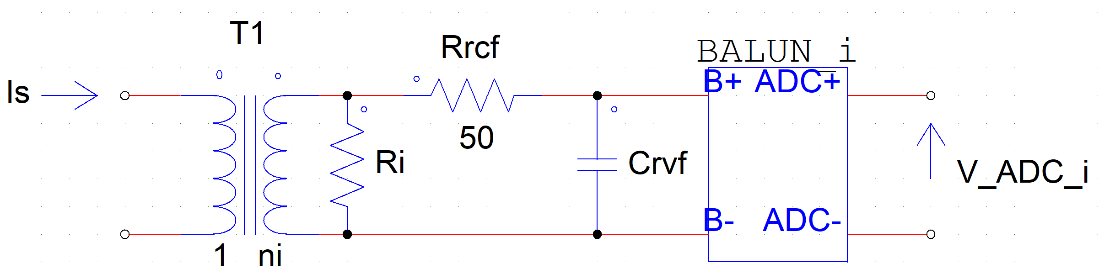

Figure 2: Current sensing circuit

The output of $T_{1}$ is connected to a SMA connector through a low pass
filter with cut-off frequency
$f_{\text{rcf}} = \frac{1}{\pi\, R_{\text{rcf}}C_{\text{rcf}}}\,$.
$R_{\text{rcf}} = 50\Omega$ for impedance matching with the input stage
of the ADC.

<table>
<colgroup>
<col style="width: 8%" />
<col style="width: 14%" />
<col style="width: 32%" />
<col style="width: 13%" />
<col style="width: 30%" />
</colgroup>
<thead>
<tr class="header">
<th><span class="math display"><em>n</em><sub><em>i</em></sub></span></th>
<th>20</th>
<th rowspan="2"><p><span class="math display"><em>γ</em><sub><em>r</em><em>i</em>, <em>A</em><em>D</em><em>C</em></sub> = 0.0135</span></p>
<p><span class="math display">max {<em>I</em><sub><em>s</em></sub>} = 37.0 <em>A</em></span></p></th>
<th>20</th>
<th rowspan="2"><p><span class="math display"><em>γ</em><sub><em>r</em><em>v</em>, <em>A</em><em>D</em><em>C</em></sub> = 0.028</span></p>
<p><span class="math display">max {<em>I</em><sub><em>s</em></sub>} = 17.9 <em>A</em></span></p></th>
</tr>
<tr class="odd">
<th><span class="math display"><em>R</em><sub><em>i</em></sub></span></th>
<th>270 mΩ</th>
<th>560 mΩ</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><span class="math display"><em>R</em><sub>rcf</sub></span></td>
<td>50 Ω</td>
<td rowspan="2"><span class="math display"><em>f</em><sub>rcf</sub> = 318<em>k</em><em>H</em><em>z</em></span></td>
<td colspan="2" rowspan="2">* Q high: Ri is at the limit might need to lower it</td>
</tr>
<tr class="even">
<td><span class="math display"><em>C</em><sub>rcf</sub></span></td>
<td>10 nF</td>
</tr>
</tbody>
</table>

### Voltage Sensing

The voltage is initially attenuated by a voltage divider by a factor
$\frac{R_{pv2}}{R_{pv1} + R_{pv2}}$ , which is then attenuated by a
signal transformer with transformation ratio $n_{v}:1$. Therefore, we
have that the voltage read by the ADC corresponds to
$v_{\text{ADC}} = \frac{1}{n_{v}}\frac{R_{pv2}}{R_{pv1} + R_{pv2}}v_{C_{r}}$.
Equivalent resistance at the primary is
$R_{T2,eq} = 2R_{\text{rvf}}n_{v}^{2}\  = 40\ k\Omega$ and we need to
have that $R_{pv2} \ll R_{T2,eq}$.

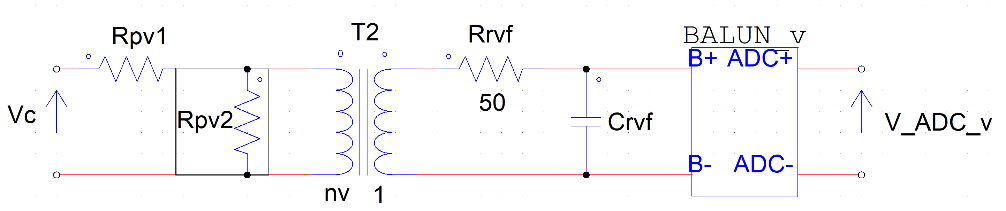

Figure 3: Voltage sensing stage in the resonant tank

Then, the output of $T_{2}$ is connected to a SMA connector through a
low pass filter with cut-off frequency
$f_{\text{rvf}} = \frac{1}{\pi\, R_{\text{rvf}}C_{\text{rvf}}}\,$.
$R_{\text{rvf}} = 50\Omega$ for impedance matching with the input stage
of the ADC.

<table>
<colgroup>
<col style="width: 8%" />
<col style="width: 13%" />
<col style="width: 31%" />
<col style="width: 13%" />
<col style="width: 32%" />
</colgroup>
<thead>
<tr class="header">
<th><span class="math display"><em>n</em><sub><em>v</em></sub></span></th>
<th>20</th>
<th rowspan="3"><p><span class="math display"><em>γ</em><sub><em>r</em><em>v</em><em>i</em>, <em>A</em><em>D</em><em>C</em></sub> = 495 × 10<sup>−6</sup></span></p>
<p><span class="math display">max {<em>V</em><sub><em>c</em></sub>} = 1010<em>V</em></span></p></th>
<th>20</th>
<th rowspan="3"><p><span class="math display"><em>γ</em><sub><em>r</em><em>v</em><em>i</em>, <em>A</em><em>D</em><em>C</em></sub> = 1.47 × 10<sup>−3</sup></span></p>
<p><span class="math display">max {<em>V</em><sub><em>c</em></sub>} = 57<em>V</em></span></p></th>
</tr>
<tr class="odd">
<th><span class="math display"><em>R</em><sub><em>p</em><em>v</em>1</sub></span></th>
<th>100 kΩ</th>
<th>4.7 kΩ</th>
</tr>
<tr class="header">
<th><span class="math display"><em>R</em><sub><em>p</em><em>v</em>2</sub></span></th>
<th>1 kΩ</th>
<th>1 kΩ</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><span class="math display"><em>R</em><sub>rvf</sub></span></td>
<td>50 Ω</td>
<td rowspan="2"><span class="math display"><em>f</em><sub>rcf</sub> = 318<em>k</em><em>H</em><em>z</em></span></td>
<td colspan="2" rowspan="2">* Q low: we might reduce <span class="math inline"><em>n</em><sub><em>v</em></sub> <em>a</em><em>n</em><em>d</em> <em>i</em><em>n</em><em>c</em><em>r</em><em>e</em><em>a</em><em>s</em><em>e</em> <em>R</em>_{<em>p</em><em>v</em>1}</span> we should keep the total resistance not too low (10mA)</td>
</tr>
<tr class="even">
<td><span class="math display"><em>C</em><sub>rvf</sub></span></td>
<td>10 nF</td>
</tr>
</tbody>
</table>

## PCB board

**<u>Two resonant tanks will be built. One with low nominal quality
factor and one with high nominal quality factor.</u>**

### Connectors

-   Power input/output: HDR 2x10 (half connector per polarity)

-   Sensing SMA connectors + HDR 1x2 (for oscilloscope: before the 50
    Ohm resistance)

GND of the SMA connector on the FPGA is connected to the common ADC
ground. i.e. can create a common ground plate on the PCB.

Figure 4: Schematics from Altium

### Components list 

|                    | values        | Description                 | code                  | manufacture |
|--------------------|---------------|-----------------------------|-----------------------|-------------|
| $$L_{r}$$          | 68uH (10uH)   | Power DC inductor           | AGP4233-683ME (103ME) | Coilcraft   |
| $$C_{r}$$          | 100nF (700nF) | 1kVDC – C0G (NP0) - SMD     | CKC21C104KDGLC7805    | Kemet       |
| $$T_{r}$$          | 1:1           | Lm=245uH                    | B65982E0012D001       | TDK         |
| $$T_{1}$$          | 1:ni          | toroid 12.7 × 7.15 × 4.9 mm | 5977000301 core       | Fair-Rite   |
| $$T_{2}$$          | nv:1          | toroid 12.7 × 7.15 × 4.9 mm | 5977000301 core       | Fair-Rite   |
| $$R_{p1}$$         | 100 kΩ        | through-hole resistance ¼W  | Precision \<1%        |             |
| $$R_{p2}$$         | 1 kΩ          | through-hole resistance ¼W  | Precision \<1%        |             |
| $$R_{i}$$          | 0.5 Ω         | through-hole resistance ¼W  | Precision \<1%        |             |
| $$R_{\text{rcf}}$$ | 50 Ω          | through-hole resistance ¼W  | Precision \<1%        |             |
| $$R_{\text{rvf}}$$ | 50 Ω          | through-hole resistance ¼W  | Precision \<1%        |             |
| $$C_{\text{rcf}}$$ | nF            | film capacitor              |                       |             |
| $$C_{\text{rvf}}$$ | nF            | film capacitor              |                       |             |
| CONNECTORS         |               |                             |                       |             |
| J3-J6              | ×2            | header 1×2                  |                       |             |
| J1-J2              | ×2            | Header 2×10                 |                       |             |
| TP                 | ×6            | Test point 1.6mm            |                       |             |
| SMA                | ×2            | FPGA connectors             | SMA-TH-vertical       |             |
| J7                 | ×1            | current jumper (wire)       |                       |             |

**  
**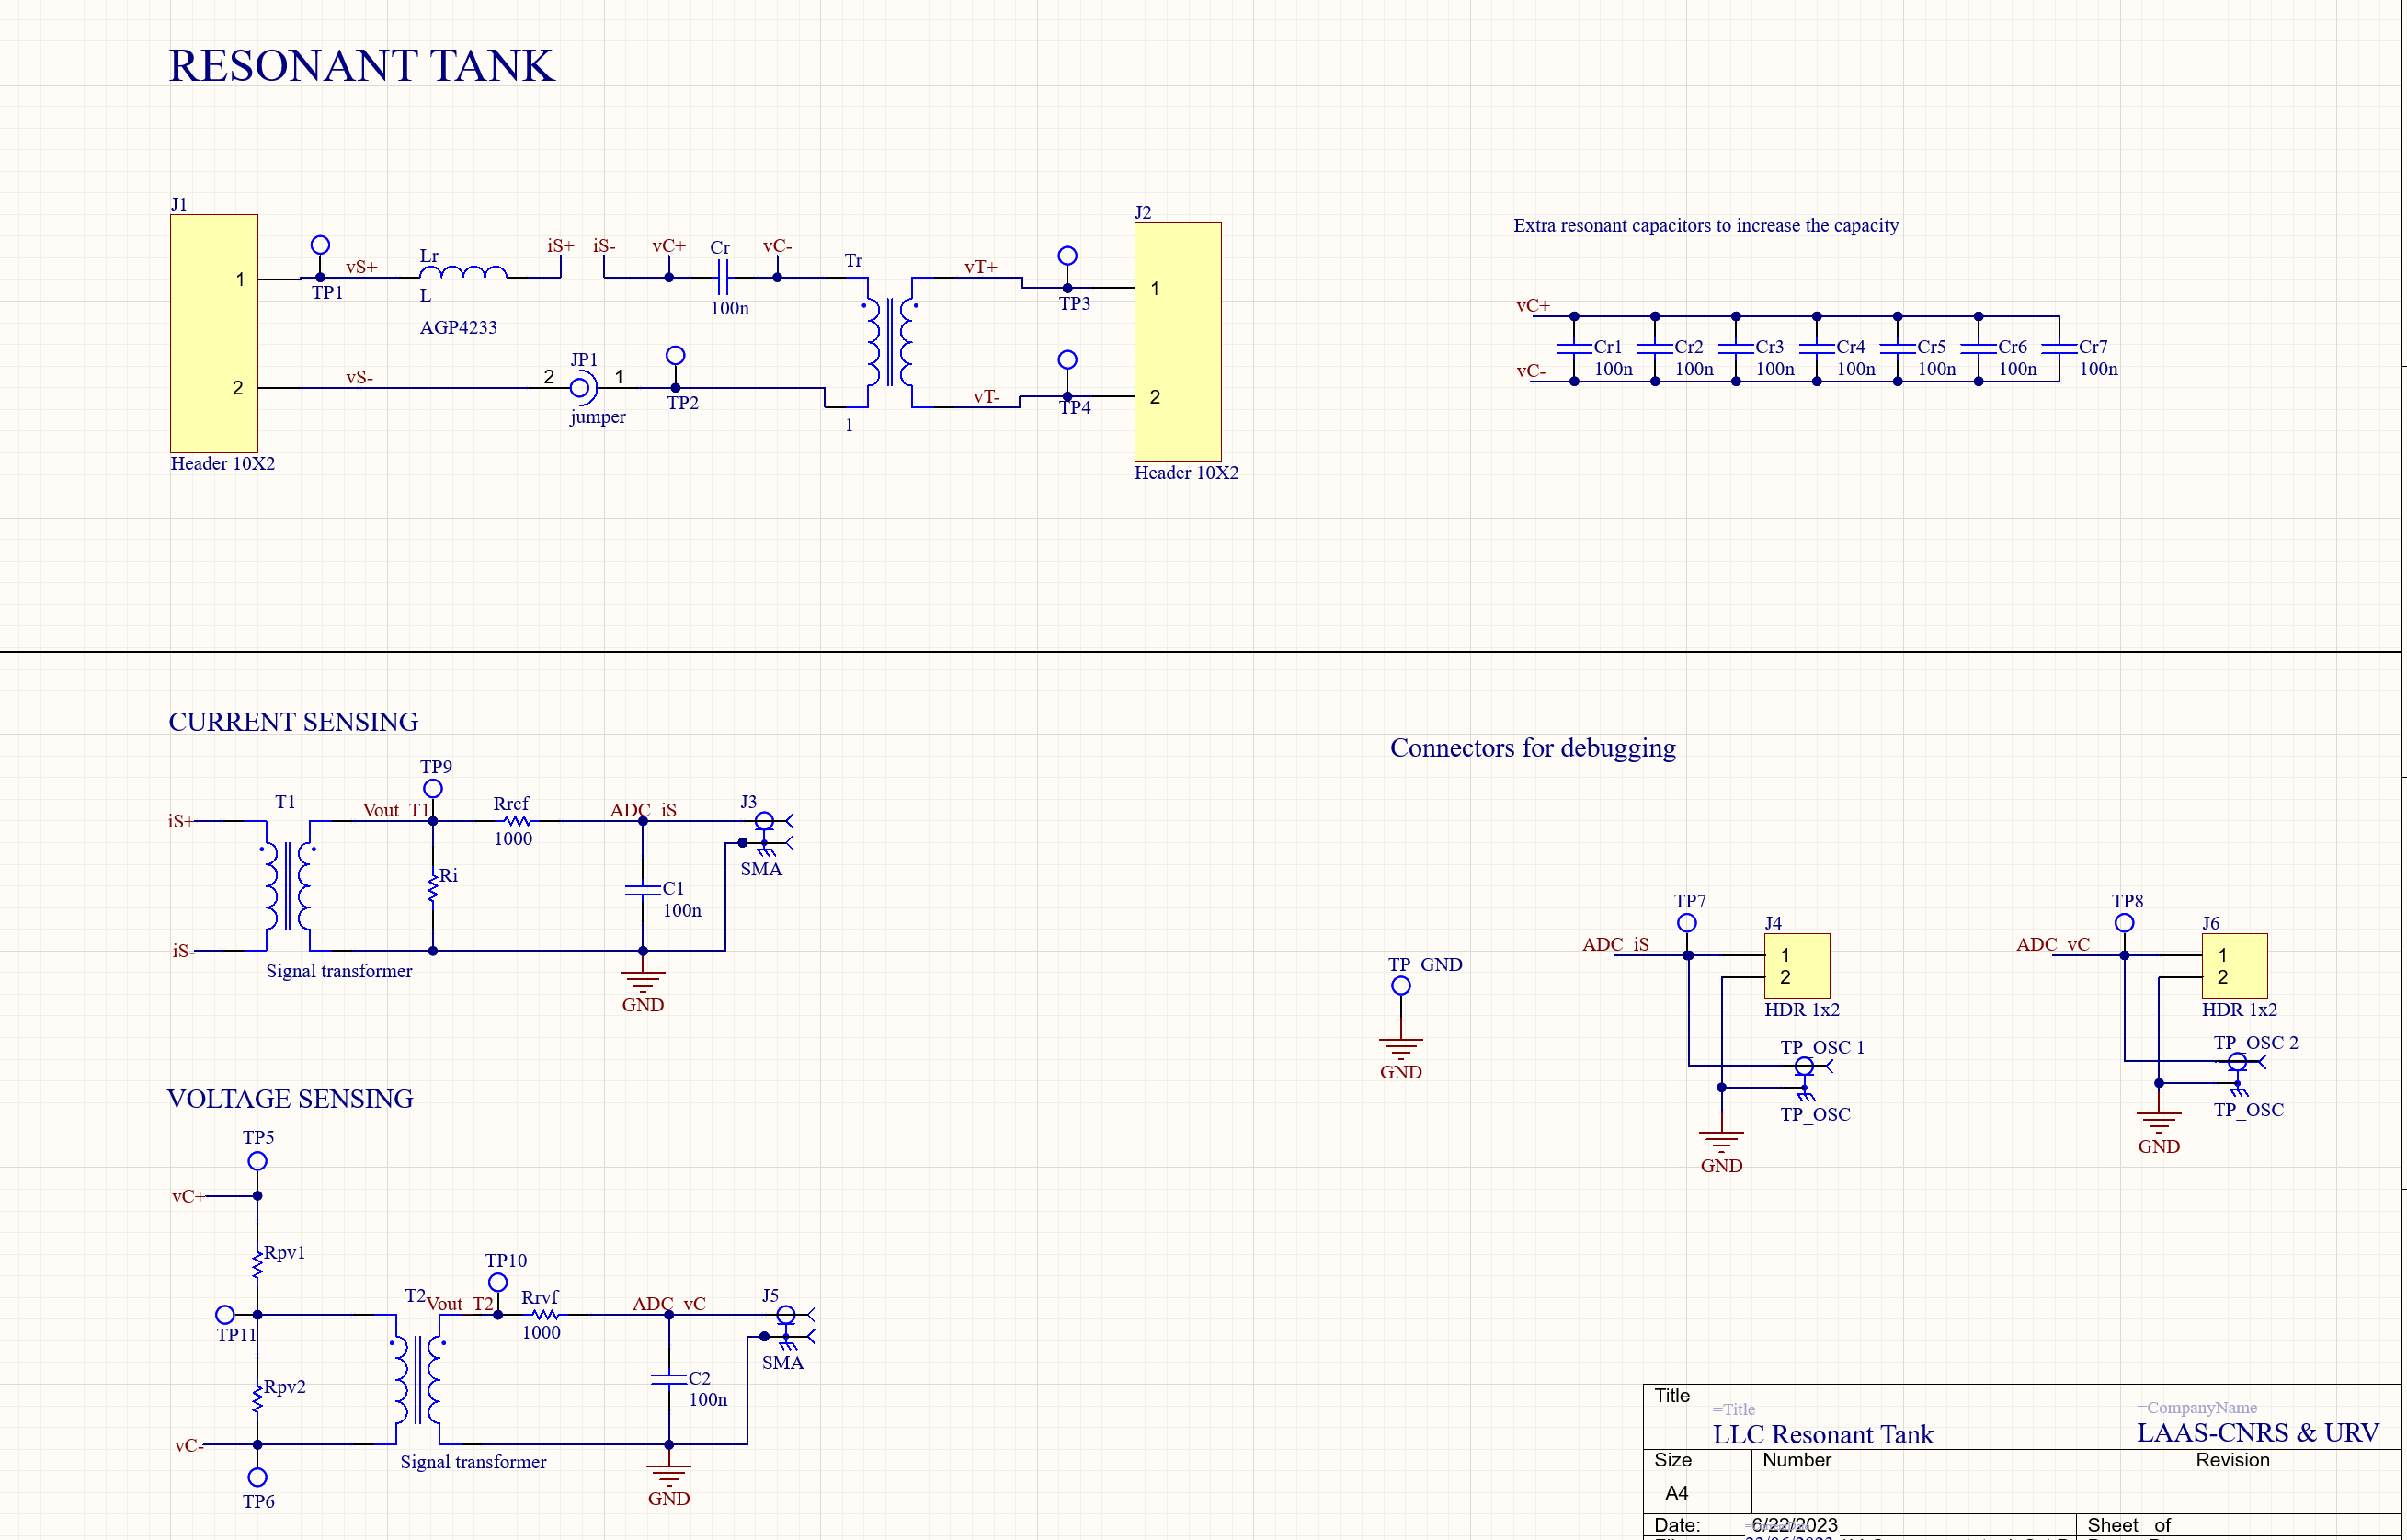<span
id="_Toc138153825" class="anchor"></span> APPENDIX

## BALUN circuit

It’s a circuit use to transform an unbalanced signal to a balanced one.
An input series-resistance is used for impedance matching to that the
output voltage corresponds to the input before the resistance (it is the
double of the one in **B+**)

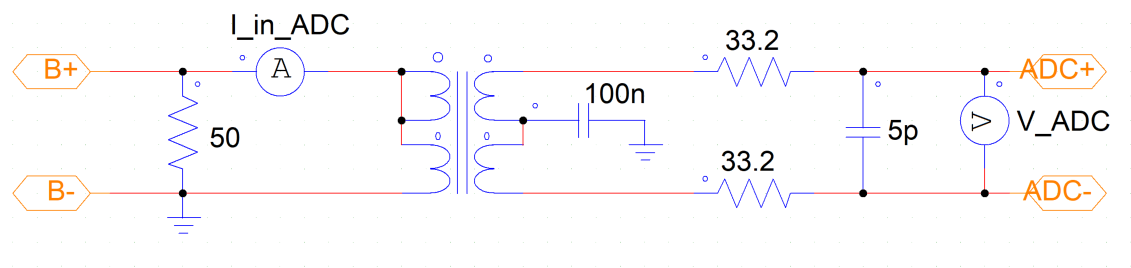

Figure 15: schematics of the BALUN circuit

## DSP 

The resolution that we can reach with a fft is equal to 1/time_window.
E.g. we are sampling at 100Mhz a window of 500us
(N=500us\*100Mhz=50000), the minimum frequency that we can discriminate
is 2kHz = 1/500us

[1] Indeed, the FPGA is then connected to the resonant tank through the
gate driver of the H-bridge. We might think to isolate also the drivers
but it not extremely necessary.